In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [7]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

0.0


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
x = df.copy()
y = x.pop('target')

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [14]:
from sklearn.metrics import accuracy_score

## logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


## Navie bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [18]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


## Support Vector Machine

In [19]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [20]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [22]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


## XG Boost

In [23]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[12:05:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [24]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


## Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                154       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12        
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10)

Epoch 1/200
82/82 [==============================] - 1s 6ms/step - loss: 52.8904 - accuracy: 0.4890 - val_loss: 27.0399 - val_accuracy: 0.4780
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 8.2295 - accuracy: 0.4988 - val_loss: 1.3156 - val_accuracy: 0.4634
Epoch 3/200
82/82 [==============================] - 0s 2ms/step - loss: 1.2785 - accuracy: 0.5061 - val_loss: 1.1625 - val_accuracy: 0.4829
Epoch 4/200
82/82 [==============================] - 0s 2ms/step - loss: 1.1828 - accuracy: 0.5280 - val_loss: 1.0765 - val_accuracy: 0.5463
Epoch 5/200
82/82 [==============================] - 0s 2ms/step - loss: 1.0920 - accuracy: 0.5317 - val_loss: 0.9545 - val_accuracy: 0.5707
Epoch 6/200
82/82 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.5707 - val_loss: 0.8646 - val_accuracy: 0.5756
Epoch 7/200
82/82 [==============================] - 0s 3ms/step - loss: 0.9371 - accuracy: 0.5756 - val_loss: 0.8090 - val_accuracy: 0.6293
Epoch 8/200

Epoch 59/200
82/82 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8098 - val_loss: 0.3449 - val_accuracy: 0.8439
Epoch 60/200
82/82 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8268 - val_loss: 0.3181 - val_accuracy: 0.8537
Epoch 61/200
82/82 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8268 - val_loss: 0.3201 - val_accuracy: 0.8634
Epoch 62/200
82/82 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8378 - val_loss: 0.3330 - val_accuracy: 0.8488
Epoch 63/200
82/82 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8085 - val_loss: 0.3829 - val_accuracy: 0.8244
Epoch 64/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8159 - val_loss: 0.4109 - val_accuracy: 0.8049
Epoch 65/200
82/82 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8268 - val_loss: 0.3531 - val_accuracy: 0.8439
Epoch 

Epoch 116/200
82/82 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8244 - val_loss: 0.3498 - val_accuracy: 0.8439
Epoch 117/200
82/82 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8183 - val_loss: 0.3194 - val_accuracy: 0.8488
Epoch 118/200
82/82 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8049 - val_loss: 0.3909 - val_accuracy: 0.8146
Epoch 119/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8268 - val_loss: 0.3182 - val_accuracy: 0.8488
Epoch 120/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8402 - val_loss: 0.3178 - val_accuracy: 0.8634
Epoch 121/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8341 - val_loss: 0.3187 - val_accuracy: 0.8488
Epoch 122/200
82/82 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8280 - val_loss: 0.4204 - val_accuracy: 0.8049

82/82 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8268 - val_loss: 0.3272 - val_accuracy: 0.8390
Epoch 174/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8280 - val_loss: 0.3557 - val_accuracy: 0.8537
Epoch 175/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8354 - val_loss: 0.3192 - val_accuracy: 0.8537
Epoch 176/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8415 - val_loss: 0.3471 - val_accuracy: 0.8439
Epoch 177/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8378 - val_loss: 0.3299 - val_accuracy: 0.8488
Epoch 178/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8280 - val_loss: 0.3239 - val_accuracy: 0.8488
Epoch 179/200
82/82 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8232 - val_loss: 0.3610 - val_accuracy: 0.8341
Epoch 180/200

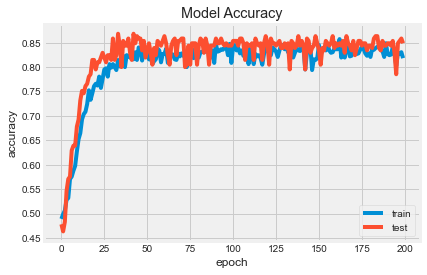

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

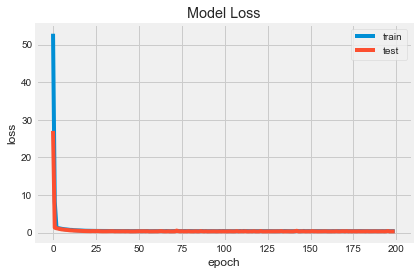

In [31]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [32]:
Y_pred_nn = model.predict(X_test)

In [33]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [34]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 84.88 %


### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Convolutional Neural Metwork

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [37]:
X_train.shape

(820, 13)

In [38]:
X_test.shape

(205, 13)

In [53]:
x_train = X_train.reshape(820,13,1)
x_test = X_test.reshape(205,13,1)

In [58]:
epochs = 100
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 12, 32)            96        
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 11, 32)            2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 11, 32)            128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 32)           

In [61]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005),metrics=['accuracy'])

C:\Users\ANKIT\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [63]:
hists = model.fit(x_train, Y_train,validation_data=(x_test, Y_test), epochs=200, verbose=1)

Epoch 1/200
26/26 [==============================] - 0s 10ms/step - loss: 0.3884 - accuracy: 0.8305 - val_loss: 0.2597 - val_accuracy: 0.9122
Epoch 2/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4238 - accuracy: 0.8159 - val_loss: 0.2595 - val_accuracy: 0.9073
Epoch 3/200
26/26 [==============================] - 0s 10ms/step - loss: 0.4176 - accuracy: 0.8268 - val_loss: 0.2593 - val_accuracy: 0.9073
Epoch 4/200
26/26 [==============================] - 0s 11ms/step - loss: 0.3907 - accuracy: 0.8195 - val_loss: 0.2590 - val_accuracy: 0.9073
Epoch 5/200
26/26 [==============================] - 0s 11ms/step - loss: 0.3993 - accuracy: 0.8293 - val_loss: 0.2583 - val_accuracy: 0.9122
Epoch 6/200
26/26 [==============================] - 0s 11ms/step - loss: 0.3976 - accuracy: 0.8341 - val_loss: 0.2581 - val_accuracy: 0.9122
Epoch 7/200
26/26 [==============================] - 0s 18ms/step - loss: 0.3956 - accuracy: 0.8232 - val_loss: 0.2577 - val_accuracy: 0.9122
Epoch 

26/26 [==============================] - 0s 14ms/step - loss: 0.3887 - accuracy: 0.8280 - val_loss: 0.2499 - val_accuracy: 0.9122
Epoch 59/200
26/26 [==============================] - 0s 14ms/step - loss: 0.3556 - accuracy: 0.8402 - val_loss: 0.2493 - val_accuracy: 0.9122
Epoch 60/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3715 - accuracy: 0.8439 - val_loss: 0.2491 - val_accuracy: 0.9122
Epoch 61/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3664 - accuracy: 0.8378 - val_loss: 0.2489 - val_accuracy: 0.9122
Epoch 62/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3854 - accuracy: 0.8220 - val_loss: 0.2486 - val_accuracy: 0.9171
Epoch 63/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3712 - accuracy: 0.8451 - val_loss: 0.2485 - val_accuracy: 0.9171
Epoch 64/200
26/26 [==============================] - 0s 10ms/step - loss: 0.3429 - accuracy: 0.8439 - val_loss: 0.2486 - val_accuracy: 0.9171
Epoch 65/200

26/26 [==============================] - 0s 13ms/step - loss: 0.3790 - accuracy: 0.8378 - val_loss: 0.2424 - val_accuracy: 0.9220
Epoch 116/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3770 - accuracy: 0.8293 - val_loss: 0.2419 - val_accuracy: 0.9220
Epoch 117/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3641 - accuracy: 0.8305 - val_loss: 0.2416 - val_accuracy: 0.9220
Epoch 118/200
26/26 [==============================] - 0s 14ms/step - loss: 0.3774 - accuracy: 0.8256 - val_loss: 0.2416 - val_accuracy: 0.9220
Epoch 119/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3400 - accuracy: 0.8524 - val_loss: 0.2413 - val_accuracy: 0.9220
Epoch 120/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3523 - accuracy: 0.8354 - val_loss: 0.2408 - val_accuracy: 0.9220
Epoch 121/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3540 - accuracy: 0.8439 - val_loss: 0.2408 - val_accuracy: 0.9220
Epoch 

Epoch 172/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3685 - accuracy: 0.8293 - val_loss: 0.2325 - val_accuracy: 0.9220
Epoch 173/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3314 - accuracy: 0.8463 - val_loss: 0.2320 - val_accuracy: 0.9220
Epoch 174/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3454 - accuracy: 0.8549 - val_loss: 0.2319 - val_accuracy: 0.9220
Epoch 175/200
26/26 [==============================] - 0s 12ms/step - loss: 0.3538 - accuracy: 0.8524 - val_loss: 0.2319 - val_accuracy: 0.9220
Epoch 176/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3420 - accuracy: 0.8500 - val_loss: 0.2321 - val_accuracy: 0.9220
Epoch 177/200
26/26 [==============================] - 0s 13ms/step - loss: 0.3602 - accuracy: 0.8341 - val_loss: 0.2317 - val_accuracy: 0.9220
Epoch 178/200
26/26 [==============================] - 0s 12ms/step - loss: 0.3610 - accuracy: 0.8427 - val_loss: 0.2312 - val_accuracy:

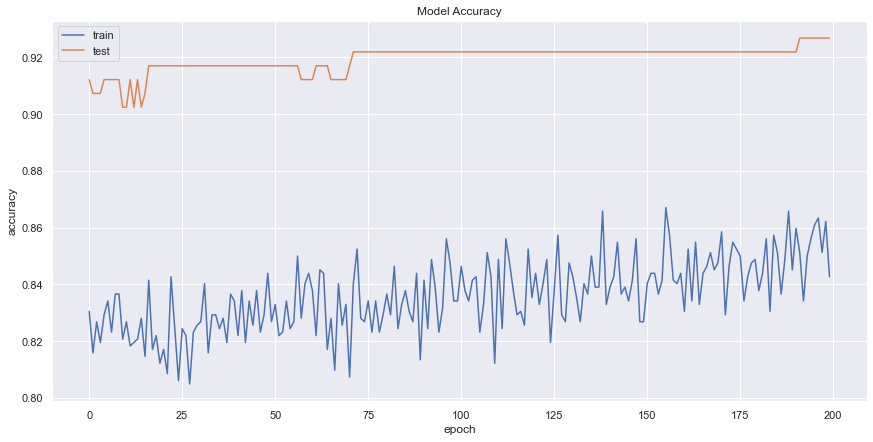

In [64]:
# Model accuracy
plt.plot(hists.history['accuracy'])
plt.plot(hists.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

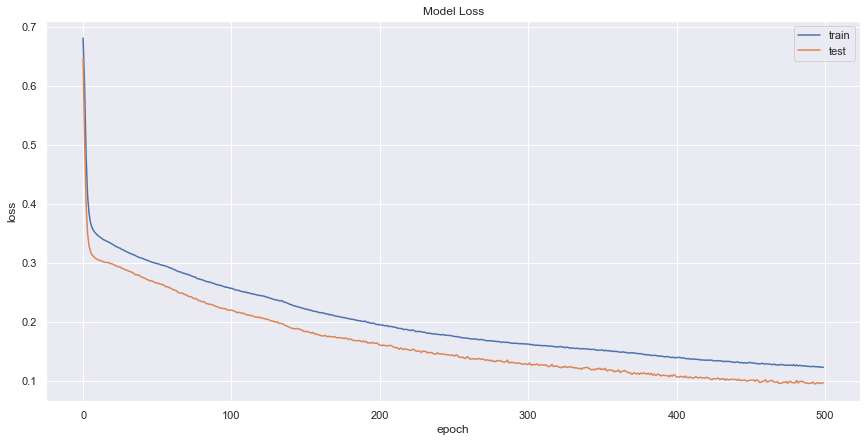

In [65]:
# Model Losss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [69]:
# Predicting the Test set results
y_pred_cnn = model.predict(x_test)

In [72]:
rounded = [round(x[0]) for x in y_pred_cnn]
Y_pred_cnn = rounded

In [73]:
score_cnn = round(accuracy_score(Y_pred_cnn,Y_test)*100,2)

print("The accuracy score achieved using artificial Neural Network is: "+str(score_cnn)+" %")

The accuracy score achieved using artificial Neural Network is: 92.68 %


## Artificial Neural Network

In [39]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# Intinialising the ANN
classifier = Sequential()

# Adding the input layer and the first Hidden layer 
classifier.add(Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform"))

# Adding the output layer 
classifier.add(Dense(activation="sigmoid", input_dim=13, units=1, kernel_initializer="uniform"))

In [41]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the training set
hist = classifier.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=10, epochs=500)

Epoch 1/500
82/82 [==============================] - 1s 5ms/step - loss: 0.6811 - accuracy: 0.7244 - val_loss: 0.6469 - val_accuracy: 0.8195
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.8098 - val_loss: 0.5090 - val_accuracy: 0.8293
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8244 - val_loss: 0.4021 - val_accuracy: 0.8537
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8366 - val_loss: 0.3507 - val_accuracy: 0.8585
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8427 - val_loss: 0.3295 - val_accuracy: 0.8683
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8476 - val_loss: 0.3193 - val_accuracy: 0.8732
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8463 - val_loss: 0.3138 - val_accuracy: 0.8732
Epoch 8/500
8

Epoch 59/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2922 - accuracy: 0.8963 - val_loss: 0.2581 - val_accuracy: 0.8976
Epoch 60/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8963 - val_loss: 0.2575 - val_accuracy: 0.8927
Epoch 61/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.8963 - val_loss: 0.2556 - val_accuracy: 0.8927
Epoch 62/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.8915 - val_loss: 0.2546 - val_accuracy: 0.8976
Epoch 63/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2882 - accuracy: 0.8988 - val_loss: 0.2539 - val_accuracy: 0.9024
Epoch 64/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.9098 - val_loss: 0.2527 - val_accuracy: 0.8976
Epoch 65/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8976 - val_loss: 0.2500 - val_accuracy: 0.9073
Epoch 

82/82 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9183 - val_loss: 0.2094 - val_accuracy: 0.9463
Epoch 117/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.9183 - val_loss: 0.2088 - val_accuracy: 0.9463
Epoch 118/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.9207 - val_loss: 0.2081 - val_accuracy: 0.9463
Epoch 119/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.9122 - val_loss: 0.2080 - val_accuracy: 0.9463
Epoch 120/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2449 - accuracy: 0.9171 - val_loss: 0.2085 - val_accuracy: 0.9463
Epoch 121/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2447 - accuracy: 0.9146 - val_loss: 0.2064 - val_accuracy: 0.9463
Epoch 122/500
82/82 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 0.9171 - val_loss: 0.2066 - val_accuracy: 0.9463
Epoch 123/500

82/82 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9305 - val_loss: 0.1735 - val_accuracy: 0.9610
Epoch 174/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9329 - val_loss: 0.1735 - val_accuracy: 0.9610
Epoch 175/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9317 - val_loss: 0.1732 - val_accuracy: 0.9610
Epoch 176/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9341 - val_loss: 0.1725 - val_accuracy: 0.9610
Epoch 177/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9329 - val_loss: 0.1719 - val_accuracy: 0.9610
Epoch 178/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9354 - val_loss: 0.1731 - val_accuracy: 0.9561
Epoch 179/500
82/82 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9329 - val_loss: 0.1718 - val_accuracy: 0.9561
Epoch 180/500

82/82 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9341 - val_loss: 0.1507 - val_accuracy: 0.9610
Epoch 231/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9341 - val_loss: 0.1503 - val_accuracy: 0.9610
Epoch 232/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9378 - val_loss: 0.1501 - val_accuracy: 0.9610
Epoch 233/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1807 - accuracy: 0.9366 - val_loss: 0.1478 - val_accuracy: 0.9610
Epoch 234/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9378 - val_loss: 0.1484 - val_accuracy: 0.9610
Epoch 235/500
82/82 [==============================] - 0s 4ms/step - loss: 0.1808 - accuracy: 0.9341 - val_loss: 0.1482 - val_accuracy: 0.9610
Epoch 236/500
82/82 [==============================] - 0s 4ms/step - loss: 0.1803 - accuracy: 0.9366 - val_loss: 0.1482 - val_accuracy: 0.9610
Epoch 237/500

82/82 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9354 - val_loss: 0.1356 - val_accuracy: 0.9610
Epoch 288/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9354 - val_loss: 0.1307 - val_accuracy: 0.9610
Epoch 289/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.9354 - val_loss: 0.1313 - val_accuracy: 0.9659
Epoch 290/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1640 - accuracy: 0.9354 - val_loss: 0.1317 - val_accuracy: 0.9659
Epoch 291/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1639 - accuracy: 0.9366 - val_loss: 0.1314 - val_accuracy: 0.9659
Epoch 292/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9354 - val_loss: 0.1306 - val_accuracy: 0.9659
Epoch 293/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1640 - accuracy: 0.9366 - val_loss: 0.1302 - val_accuracy: 0.9659
Epoch 294/500

82/82 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9390 - val_loss: 0.1187 - val_accuracy: 0.9707
Epoch 345/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9427 - val_loss: 0.1201 - val_accuracy: 0.9659
Epoch 346/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9402 - val_loss: 0.1188 - val_accuracy: 0.9659
Epoch 347/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1520 - accuracy: 0.9366 - val_loss: 0.1206 - val_accuracy: 0.9707
Epoch 348/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9402 - val_loss: 0.1206 - val_accuracy: 0.9707
Epoch 349/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.9390 - val_loss: 0.1217 - val_accuracy: 0.9707
Epoch 350/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9415 - val_loss: 0.1196 - val_accuracy: 0.9659
Epoch 351/500

82/82 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.9512 - val_loss: 0.1069 - val_accuracy: 0.9756
Epoch 402/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9512 - val_loss: 0.1070 - val_accuracy: 0.9756
Epoch 403/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.9561 - val_loss: 0.1066 - val_accuracy: 0.9756
Epoch 404/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9537 - val_loss: 0.1079 - val_accuracy: 0.9756
Epoch 405/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.9524 - val_loss: 0.1075 - val_accuracy: 0.9756
Epoch 406/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9524 - val_loss: 0.1061 - val_accuracy: 0.9756
Epoch 407/500
82/82 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9524 - val_loss: 0.1084 - val_accuracy: 0.9756
Epoch 408/500

82/82 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9537 - val_loss: 0.0980 - val_accuracy: 0.9756
Epoch 459/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9524 - val_loss: 0.0995 - val_accuracy: 0.9756
Epoch 460/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9561 - val_loss: 0.1000 - val_accuracy: 0.9756
Epoch 461/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9573 - val_loss: 0.1023 - val_accuracy: 0.9756
Epoch 462/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9549 - val_loss: 0.0981 - val_accuracy: 0.9756
Epoch 463/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9524 - val_loss: 0.0994 - val_accuracy: 0.9756
Epoch 464/500
82/82 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9549 - val_loss: 0.1002 - val_accuracy: 0.9756
Epoch 465/500

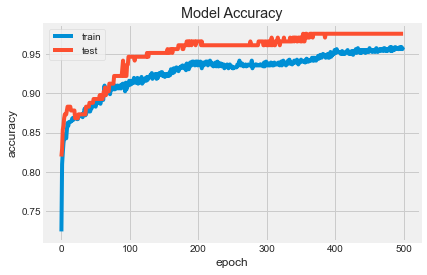

In [42]:
# Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

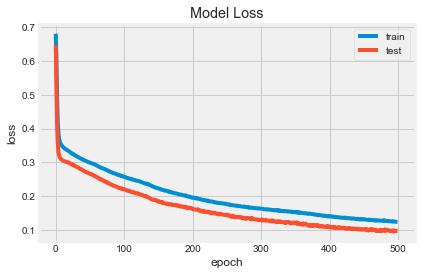

In [43]:
# Model Losss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [44]:
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)

In [45]:
rounded = [round(x[0]) for x in y_pred_ann]
Y_pred_ann = rounded

In [46]:
score_ann = round(accuracy_score(Y_pred_ann,Y_test)*100,2)

print("The accuracy score achieved using artificial Neural Network is: "+str(score_ann)+" %")

The accuracy score achieved using artificial Neural Network is: 97.56 %


## model with best score

In [74]:
scores = [score_lr,score_nb,score_svm,score_knn,score_xgb,score_nn,score_ann,score_cnn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","XGBoost","Neural Network","Art. Neural Network","Conv. Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 84.88 %
The accuracy score achieved using Art. Neural Network is: 97.56 %
The accuracy score achieved using Conv. Neural Network is: 92.68 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

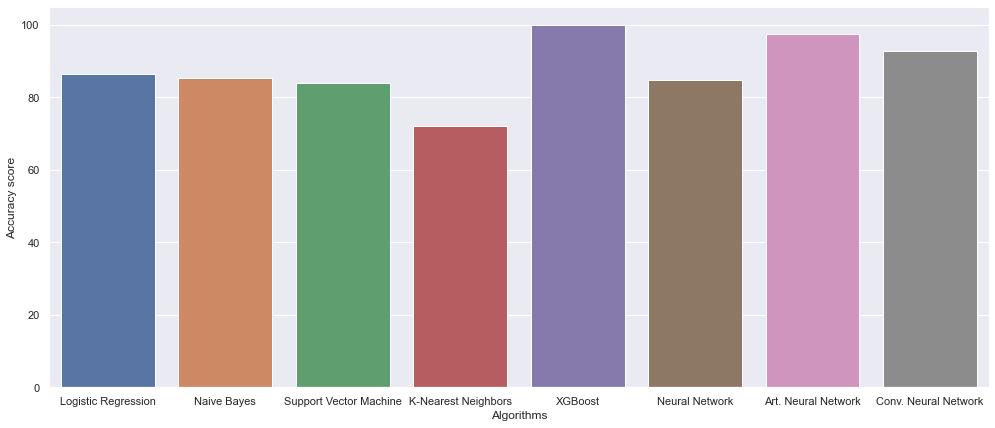

In [76]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## The accuracy score achieved using XG Boost is: 100 % this model is most accurate model of all the model trained in this datasets